In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate

from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
df=pd.read_csv("Group_13_data_cleaned.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [11]:
# prepare the data for the model
# select the only NOX as target variabel
nox_df = df.copy()
nox_df = nox_df.drop("CO", axis = 1) # drop the target variable CO

In [12]:
nox_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,64.738


In [13]:
from sklearn.preprocessing import MinMaxScaler
col = nox_df.columns
col

scaler = MinMaxScaler()

for column in col:
    scaler.fit(nox_df[[column]])
    nox_df[column] = scaler.transform(nox_df[[column]])
nox_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
0,0.246426,0.676829,0.740963,0.389486,0.310004,0.780269,0.943764,0.471397,0.398621,0.596213
1,0.239599,0.664634,0.749741,0.388203,0.308622,0.778774,0.959625,0.471397,0.397452,0.600734
2,0.230590,0.667683,0.759507,0.391317,0.310547,0.784753,0.969719,0.477246,0.426673,0.615616
3,0.226861,0.664634,0.768536,0.390794,0.306648,0.784753,0.968277,0.476294,0.416543,0.602096
4,0.227046,0.649390,0.764586,0.390088,0.306944,0.775785,0.956020,0.471397,0.400958,0.597021
...,...,...,...,...,...,...,...,...,...,...
36728,0.224154,0.975610,0.890272,0.282275,0.068555,0.044843,0.349676,0.123257,0.108938,0.673017
36729,0.236683,0.978659,0.903376,0.289131,0.065051,0.053812,0.399423,0.119312,0.095886,0.669581
36730,0.267150,0.975610,0.921921,0.320664,0.057203,0.059791,0.485941,0.105979,0.118873,0.747216
36731,0.276460,0.981707,0.905947,0.496068,0.289472,0.641256,0.963951,0.427046,0.373880,0.413095


# Principle component analysis 

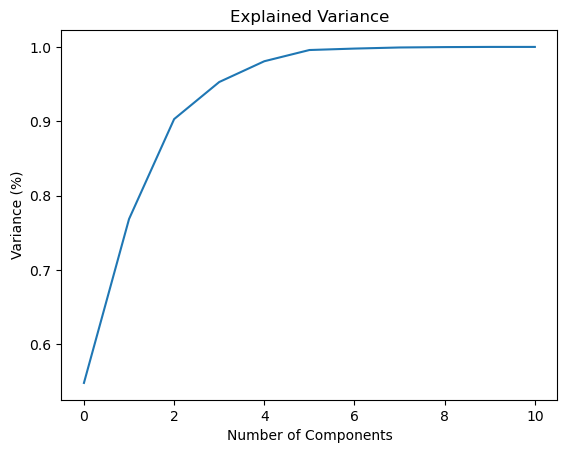

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plot.figure()
plot.plot(np.cumsum(pca.explained_variance_ratio_))
plot.xlabel('Number of Components')
plot.ylabel('Variance (%)') #for each component
plot.title('Explained Variance')
plot.show()

# From the above diagram, we can see that from 5 , 6 components shows significant variance in the data. Hence we will feed PC1 to PC5  principal components to work on Clustering Algorithms.

In [16]:
principalComponents.shape

(36733, 11)

In [18]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2' , 'PC3','PC4','PC5' ,])

In [19]:
percentage_variance = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(percentage_variance)+1)]
 



In [20]:
percentage_variance

array([54.8, 22. , 13.4,  5. ,  2.8])

In [21]:
principal_Df.head()

,PC1,PC2,PC3,PC4,PC5
0,0.091956,-16.253917,13.849126,-1.594258,-7.175565
1,0.376892,-16.912040,13.890048,-1.977071,-6.983137
2,0.131298,-18.197108,14.792440,-2.498187,-7.177091
3,0.139209,-18.236125,13.494638,-2.050343,-7.152756
4,0.677433,-17.701068,13.177813,-1.940172,-6.576192


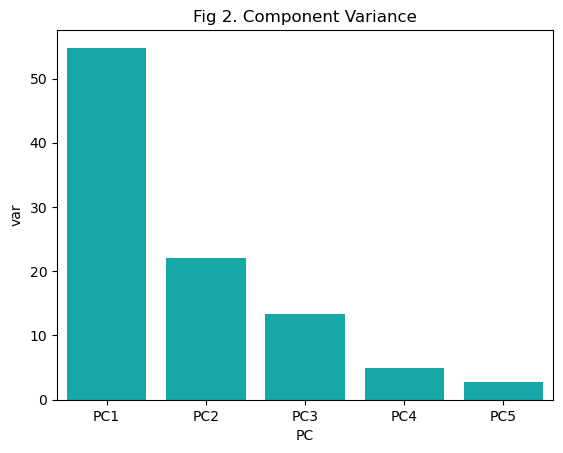

In [22]:
import seaborn as sn
dfScree = pd.DataFrame({'var':percentage_variance,'PC':['PC1','PC2','PC3','PC4','PC5']})
sn.barplot(x='PC',y="var",data=dfScree, color="c").set_title('Fig 2. Component Variance');

In [23]:
nox_df.shape

(36733, 10)

In [24]:
y = nox_df['NOX']
y

0        0.596213
1        0.600734
2        0.615616
3        0.602096
4        0.597021
           ...   
36728    0.673017
36729    0.669581
36730    0.747216
36731    0.413095
36732    0.886495
Name: NOX, Length: 36733, dtype: float64


# Self Organizing maps

In [25]:
from minisom import MiniSom

In [26]:
som = MiniSom( x = 10, y = 10, input_len = 10, sigma = 1.0, learning_rate = 0.5, neighborhood_function='gaussian', random_seed=0)

In [27]:
scaled_data = nox_df.to_numpy()
scaled_data
som.random_weights_init(scaled_data)

In [28]:
som.train_random(data = scaled_data, num_iteration = 100)

In [29]:
scaled_y = y.to_numpy()
scaled_y = list(map(int, scaled_y))

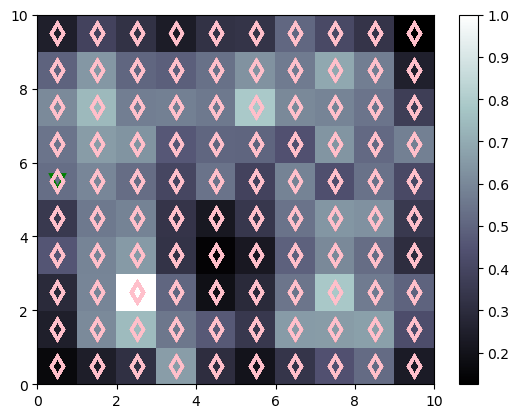

In [30]:
# making a self organization map 
from pylab import bone, pcolor, colorbar, plot, show 
bone() 
pcolor(som.distance_map().T) 
colorbar() 
markers = ["d", "v", "s", "*", "^"] 
colors = ['pink', 'green', 'cyan', 'yellow', 'orange'] 
for i, x in enumerate(scaled_data):
    W = som.winner(x) 
    plot(W[0] + 0.5,
    W[1] + 0.5, markers[scaled_y[i]], markeredgecolor = colors [scaled_y[i]], markerfacecolor = 'None', markersize = 10,
    markeredgewidth = 2) 
show()

In [31]:
label_names = [0]
label_names

[0]

In [32]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [33]:
X = nox_df[['AT', 'AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP' ]]
X



y = nox_df['NOX']

In [34]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(29386, 9) (29386,) (7347, 9) (7347,)


In [35]:
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner
# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [36]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)


In [37]:
train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

In [38]:
train_y

8372     0.352300
13525    0.313132
25679    0.273337
10388    0.395107
21214    0.500271
           ...   
16850    0.544290
6265     0.513366
11284    0.472496
860      0.568938
15795    0.548769
Name: NOX, Length: 29386, dtype: float64

In [39]:
# collecting labels

label_data = train_y.to_numpy()
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000
sample data:  2000
sample data:  3000
sample data:  4000
sample data:  5000
sample data:  6000
sample data:  7000
sample data:  8000
sample data:  9000
sample data:  10000
sample data:  11000
sample data:  12000
sample data:  13000
sample data:  14000
sample data:  15000
sample data:  16000
sample data:  17000
sample data:  18000
sample data:  19000
sample data:  20000
sample data:  21000
sample data:  22000
sample data:  23000
sample data:  24000
sample data:  25000
sample data:  26000
sample data:  27000
sample data:  28000
sample data:  29000


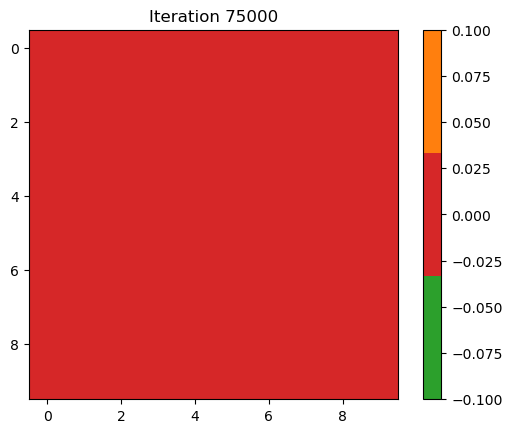

In [40]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()